# Data Extraction

In [ ]:
import tweepy
import csv
import pandas as pd
####input your credentials here
#consumer_key = 'aSuYAwIDEvZvfXNzpGTsLYsbR'
#onsumer_secret = 'sUFtxWThulUJAFdVj8x58ks0nnusUvvIdZZE74lT0cf3RBdXEn'
#access_token = '1088864398968586240-qZC478ilf53rfPZiehWtN91HQlYpDg'
#access_token_secret = 'd0C3uTQXVvcaMoJvInx37mfIMlL1CUU9wTZyeY6LYJUHv'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)
#####United Airlines
# Open/Create a file to append data
csvFile = open('C:\\Users\\ganch\\Desktop\\twitterData_new_vis.csv', 'a')
#Use csv Writer
csvWriter = csv.writer(csvFile)

for tweet in tweepy.Cursor(api.search,q="DataScience",
                           lang="en",
                           since="2018-01-01").items():
    #print (tweet.created_at, tweet.text)
    csvWriter.writerow([tweet.created_at,tweet.retweet_count,tweet.favorite_count,tweet.text.encode("utf-8")])

# Data Import After Cleaning in R

In [1]:
import pandas as pd
df = pd.read_csv("C:\\Users\\ganch\\Desktop\\Independent Study\\python_twitter_collection_sample\\concat_cleaned_data.csv",names = ["Created", "Retweet", "Likes", "Text","Cleaned_Text"])

In [3]:
data=df.drop_duplicates(subset="Text")

# Data Cleaning

In [5]:
import re
list1=[]
for i in data.Cleaned_Text.values:
    
    t= ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(http\S+)", " ", str(i)).split())
    
    t=re.sub("RT"," ",t)
    t=re.sub("[^a-zA-Z]", " ", t)
    t = re.sub(r'\d+'," ",t)
    t=re.sub("gt", " ",t)
    t = re.sub("http"," ",t)
    t = re.sub("https"," ",t)
    t = re.sub("^www."," ",t)
    t = re.sub(".*\.com$"," ",t)
    shortword = re.compile(r'\W*\b\w{1,3}\b')
    t = shortword.sub('',t)
    
    
    list1.append(t)

In [6]:
data["Cleaned_Text"]=list1

C:\Users\ganch\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# NLTK for stopwords

In [1]:
import nltk
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
nltk.download()
from nltk.corpus import stopwords

print('Success')

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
Success


In [8]:
data['Text Length'] = data['Cleaned_Text'].str.len()
data.describe()

C:\Users\ganch\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Retweet,Likes,Text Length
count,228553.000000,228553.000000,228553.000000
mean,2.161936,2.273656,101.331884
std,23.737615,11.682637,35.982382
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,79.000000
50%,0.000000,1.000000,96.000000
75%,2.000000,2.000000,114.000000
max,8162.000000,2719.000000,590.000000


# Bar Plots

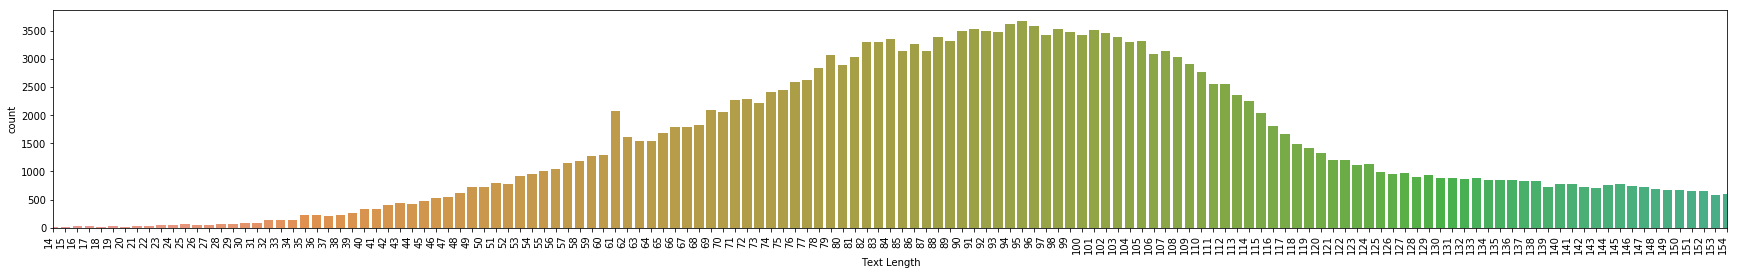

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns
f = sns.countplot(data['Text Length'],orient = 'v')
f.set_xticklabels(f.get_xticklabels(), rotation=90, ha="right")

# s = sns.countplot(data['Likes'])
# s.set(xlim= (0,100))
f.set(xlim= (10,150))

plt.rcParams["figure.figsize"] = (30, 4)
#plt.invert_yaxis() 

#fig, axs = plt.subplot(1, 4, sharey=True, tight_layout=True)
# plt.figure(figsize=(15, 3))
# plt.subplot(1, 6, 1)
# plt.tight_layout()
# # d = data['Retweet'].to_frame()
# # print(type(d))
# data['Retweet'].plot.hist(cumulative=False,histtype='bar',title="Retweets",xlim= (0,10))
# #data['Retweet'].plot
# #plt.show()
# plt.subplot(1, 6, 3)
# data['Likes'].plot.hist(cumulative=False,title="Likes")
# #plt.show()
# plt.subplot(1, 6, 5)
# data['Text Length'].plot.hist(cumulative=False,bins=20,title="Text Length")
# plt.show()

# Box Plots

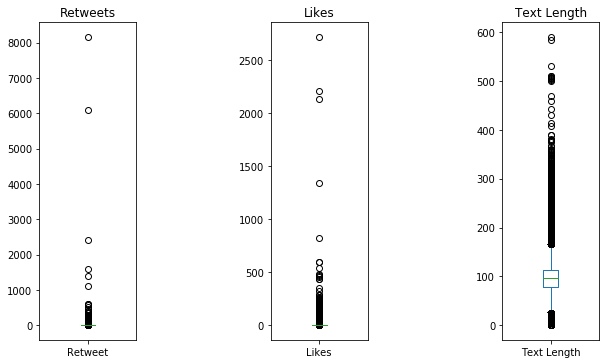

In [17]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 6, 1)
plt.tight_layout()
data['Retweet'].plot(kind='box',title="Retweets")
#plt.show()
plt.subplot(1, 6, 3)
data['Likes'].plot(kind='box',title="Likes")
#plt.show()
plt.subplot(1, 6, 5)
data['Text Length'].plot(kind='box',title="Text Length")
plt.show()

# Scatter Matrix

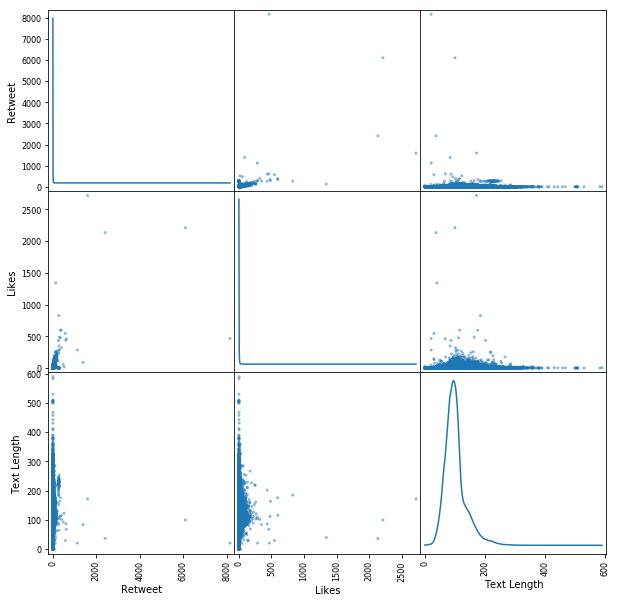

In [143]:
temp = pd.plotting.scatter_matrix(data, diagonal="kde", figsize=(10, 10))

# Correlation

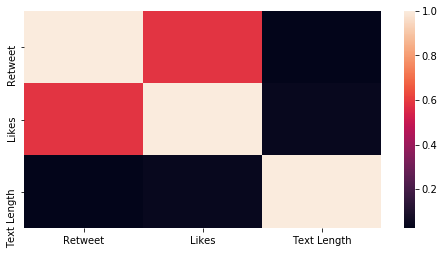

In [148]:
import seaborn as sns


# calculate the correlation matrix
corr = data.corr()
plt.rcParams["figure.figsize"] = (8, 4)

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
#ax = sns.heatmap(heatmap_data['Retweet','Likes','Text Length'])

# Outlier Removal

In [149]:
## removing outlier data

def rm_outliers(data,column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    non_outliers = (data[column] >= Q1-(3*IQR)) & (data[column] <= Q3 + (3.5*IQR))
    outlier_reduction = data.loc[non_outliers]
    return outlier_reduction

In [150]:
## Title lengths that performed better 
#plt.figure(figsize=(10, 5))
data_retweet = pd.DataFrame()
#plt.subplot(1, 6, 1)
#plt.tight_layout()
#print(data.head(10))
#len(data['Retweet'])
data_retweet = rm_outliers(data, 'Retweet')
#data_retweet.head(10)

data_likes = rm_outliers(data_retweet, 'Likes')
data_likes.head(10)

data_text_length = rm_outliers(data_likes, 'Text Length')
data_text_length.count()

#len(data_text_length)

data_after_outlier = data_text_length
#list(data_retweet)
len(data_after_outlier)

212470

In [151]:
data_after_outlier.drop(columns = ['Text'],inplace=True,axis = 1)

d#ata_after_outlier

#print(max(data_after_outlier))


C:\Users\ganch\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Created,Retweet,Likes,Cleaned_Text,Text Length
0,12/21/2015 18:55,0,5,Very Hadoopy Christmas hortonworkscomblogav...,104
1,12/21/2015 18:51,1,2,keep good customers fire customers dont need ...,80
2,12/21/2015 18:48,0,1,Improving Fingerprinting Machine Learning acad...,142
3,12/21/2015 18:47,0,0,ManuelGCubedo bigdataconf DataScience Traini...,108
4,12/21/2015 18:45,0,0,Thanks AAASFellowships KatSongPR mention Movin...,203
5,12/21/2015 18:45,0,0,IEBigData airlines data insights measure loy...,91
6,12/21/2015 18:45,0,0,strataconf pacoid teaches prepare your organ...,102
8,12/21/2015 18:45,0,0,Angoss DataScience Driving Driverless owly...,51
9,12/21/2015 18:45,0,0,Five DataScience Predictions owlyWcn,38
10,12/21/2015 18:45,0,1,analyticbridge Berkeley DataScience Capstone...,168


In [42]:
data_after_outlier = data_after_outlier.drop_duplicates(subset="Cleaned_Text")

# Word Count Analysis

In [152]:
import numpy as np
def WordCount_Features_Hist(word_Count): 
    k=1
    for i in ['Retweet','Likes']:
        temp = data_after_outlier.groupby(data_after_outlier[word_Count]).mean()[i]
        plt.subplot(3,1,k)
        temp.plot.bar()
        plt.title('{} frequency'.format(i,word_Count))
        k = k+2




C:\Users\ganch\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


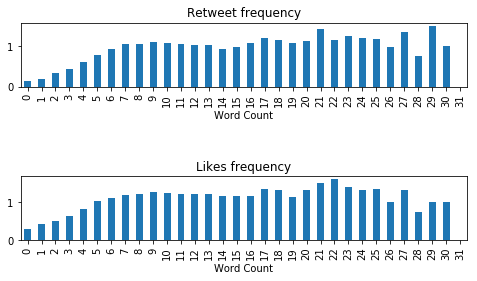

In [153]:
import matplotlib.pyplot as plt
word_Count = 'Word Count'
data_after_outlier[word_Count] = data_after_outlier['Cleaned_Text'].str.split().apply(len)
data_after_outlier.head(10)
WordCount_Features_Hist(word_Count)

In [154]:
def top_like_retweet_words():
    k=1
    plt.figure(figsize=(10, 20))
    for i in ['Retweet','Likes']:
        PERCENTAGE = 25
        title_stat_top = data_after_outlier.sort_values(by=[i], ascending=False).head(int(len(data_after_outlier)*(PERCENTAGE/100.00)))
        x = pd.DataFrame({
                col:np.repeat(title_stat_top[col].values, title_stat_top['Words'].str.len())
                for col in title_stat_top.columns.difference(['Words'])
            }).assign(**{'Words':np.concatenate(title_stat_top['Words'].values)})[title_stat_top.columns.tolist()]
        temp = x.groupby('Words').count()[i].sort_values(ascending=False).head(20).sort_values(ascending=True)
        plt.subplot(3,1,k)
        temp.plot.barh()
        k = k+1
        #sns.despine()
        plt.title('Most used {} on top {}% {}'.format('Words', PERCENTAGE, i));

# Top Words

C:\Users\ganch\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


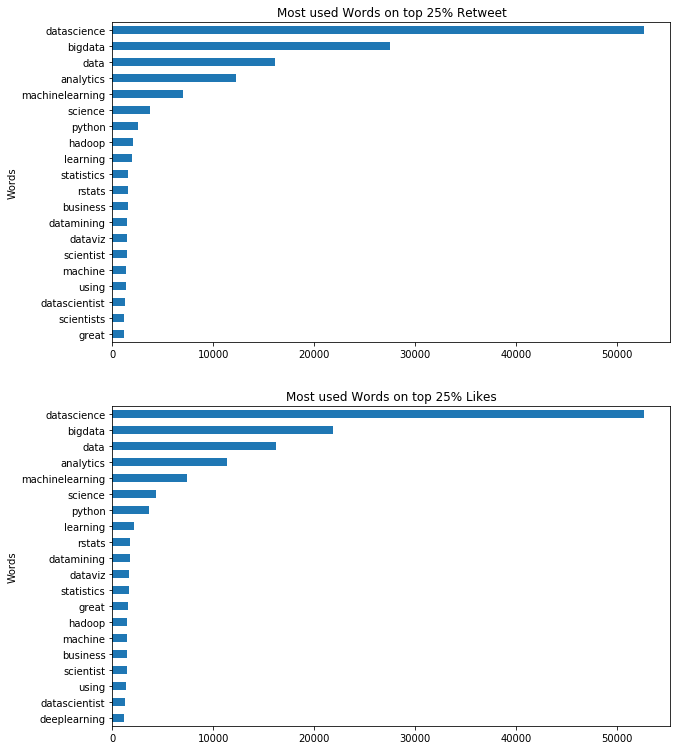

In [155]:
import nltk
import numpy as np
split_Text = data_after_outlier['Cleaned_Text'].str.lower().str.split()
# temp = title_stat['Title'].str.lower().str.split()
# remove common words (it, a, the, ...)
stop=set(nltk.corpus.stopwords.words('english'))
data_after_outlier['Words'] = split_Text.apply(lambda x: [item for item in x if item not in stop and not '\\' in item])
top_like_retweet_words()

# Drop Duplicates

In [156]:
data_after_outlier = data_after_outlier[data_after_outlier.Retweet != 0]
data_after_outlier = data_after_outlier[data_after_outlier.Likes != 0]

# Binning

In [159]:
bins = [0,1,2,5,10000]
label = [1,2,3,4]

#data_after_outlier['binned_Retweet'] = pd.cut(data_after_outlier['Retweet'], bins)
data_after_outlier['bin_class_Retweet'] = pd.cut(data_after_outlier['Retweet'], bins, labels=label)

#data_after_outlier['binned_Likes'] = pd.cut(data_after_outlier['Likes'], bins)
data_after_outlier['bin_class_Likes'] = pd.cut(data_after_outlier['Likes'], bins, labels=label)



